In [1]:
import requests
import json
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
COUNTRY_DATA = {
        "USA": "United States",
        "ESP": "Spain",
        "HUN": "Hungary",
        "MAR": "Morocco",
        "CHL": "Chile",
        "HRV": "Croatia",
        "JPN": "Japan",
        "FIN": "Finland",
        "DEU": "Germany",
        "NZL": "New Zealand",
        "JOR": "Jordan",
        "ZAF" : "South Africa"
        # Add more countries as needed
    }

ADV_COUNTRIES  = [
        "USA",
        "ESP",
        "JPN",
        "FIN",
        "DEU",
        "NZL",
    ]

EMER_COUNTRIES = [
    "MAR",
    "CHL",
    "JOR",
    "ZAF",
    "HUN",
    "HRV",
]

INDICATORS = {
    "Population": "LP",
    "current account balance": "BCA_NGDPD",
    #"General government total expenditure": "GGX_NGDP",
    "General government net lending/borrowing": "GGXCNL_NGDP",
    #"General government structural balance": "GGXONLB_NGDP",
    #"General Government Revenue": "GGR_NGDP",
    "General government gross debt": "GGXWDG_NGDP",
    "Unemployment rate": "LUR",
    "GDP per Capita": "NGDPDPC",
    "Government revenue (% of GDP)": "rev",
    "Government expenditure (% of GDP)": "exp",
    "Gross public debt": "d",
    "Real GDP growth rate": "rgc",
    #"Export Quality Index": "SITC1_total",
    "Household Debt": "HH_ALL",
    #"Public Sector Debt (% of GDP)": "PS_DEBT_GDP",
    #"Trade balance (% of GDP)": "BT_GDP",
    #"Gross national savings (% of GDP)": "NGS_GDP"
    #"Gross national savings": "NGSD_NGDP",
    #"Total investment": "NID_NGDP"
}

TIME_SPAN = list(range(2018, 2023+1)) 

BASE_URL = "https://www.imf.org/external/datamapper/api/v1/"

In [3]:
def parseData(rawData):
    countries = []
    years = []
    values = []
    for country in data.keys():
        country_data = data[country]
        countries += [country]*len(country_data)
        years += country_data.keys()
        values += country_data.values()
        
    dfSource = {
        "Country": countries,
        "Year": years,
        indicator_id: values,
    }
    return pd.DataFrame(dfSource)

In [4]:
def mergeDFs(main_df, new_df):
    if main_df is None:
        return new_df
    else:
        return pd.merge(main_df, new_df, on=["Country","Year"], how="outer")

In [5]:
country_codes = "/".join(COUNTRY_DATA.keys())
periods = ",".join((str(y) for y in TIME_SPAN))

In [6]:
main_df = None
for indicator_name, indicator_id in INDICATORS.items():
    #for year in [2018]: #TIME_SPAN:
    #url = f"{base_url}/{indicator_id}/{country_code}?periods={year}"
    url = f"{BASE_URL}/{indicator_id}/{country_codes}?periods={periods}"
    print(url)
    #try:
    response = requests.get(url)
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        data = response.json()["values"][indicator_id]
        indicator_df = parseData(data)
        main_df = mergeDFs(main_df, indicator_df)
    else:
        print(response.status_code)
       

https://www.imf.org/external/datamapper/api/v1//LP/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU/NZL/JOR/ZAF?periods=2018,2019,2020,2021,2022,2023
https://www.imf.org/external/datamapper/api/v1//BCA_NGDPD/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU/NZL/JOR/ZAF?periods=2018,2019,2020,2021,2022,2023
https://www.imf.org/external/datamapper/api/v1//GGXCNL_NGDP/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU/NZL/JOR/ZAF?periods=2018,2019,2020,2021,2022,2023
https://www.imf.org/external/datamapper/api/v1//GGXWDG_NGDP/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU/NZL/JOR/ZAF?periods=2018,2019,2020,2021,2022,2023
https://www.imf.org/external/datamapper/api/v1//LUR/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU/NZL/JOR/ZAF?periods=2018,2019,2020,2021,2022,2023
https://www.imf.org/external/datamapper/api/v1//NGDPDPC/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU/NZL/JOR/ZAF?periods=2018,2019,2020,2021,2022,2023
https://www.imf.org/external/datamapper/api/v1//rev/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU/NZL/JOR/ZAF?periods=2018,2019,2020,2021,2022,2023
https://w

In [7]:
#main data indicators data frame 
main_df
#advanced countries data frame
advanced_df = main_df.loc[main_df["Country"].isin(ADV_COUNTRIES)]
advanced_df.reset_index(drop = True, inplace = True)
#emerging countries data frame
emerging_df = main_df.loc[main_df["Country"].isin(EMER_COUNTRIES)]
emerging_df.reset_index(drop = True, inplace = True)
advanced_df

,Country,Year,LP,BCA_NGDPD,GGXCNL_NGDP,GGXWDG_NGDP,LUR,NGDPDPC,rev,exp,d,rgc,HH_ALL
0,DEU,2018,82.906,8.0,1.9,61.9,3.2,47961.181,46.270900,44.320997,61.316347,0.983762,52.664577
1,DEU,2019,83.093,8.2,1.5,59.5,3.0,46810.283,46.528809,45.002547,58.925563,1.070506,53.503049
2,DEU,2020,83.161,7.1,-4.3,68.7,3.6,46711.984,46.122489,50.461788,67.986011,-3.829225,57.055937
3,DEU,2021,83.196,7.7,-3.6,69.0,3.6,51460.987,47.349984,50.936516,68.622975,3.168678,56.755744
4,DEU,2022,83.798,4.2,-2.5,66.1,3.1,48756.309,46.977618,49.477354,66.535292,1.804266,55.238489
5,DEU,2023,83.861,6.0,-2.9,65.9,3.3,52823.575,NaN,NaN,NaN,NaN,NaN
6,ESP,2018,46.729,1.9,-2.6,100.4,15.3,30438.338,39.218879,41.812538,100.415481,2.283134,62.889009
7,ESP,2019,47.105,2.1,-3.1,98.2,14.1,29603.298,39.223677,42.283942,98.221004,1.983288,60.804263
8,ESP,2020,47.356,0.6,-10.1,120.3,15.5,26968.374,41.784434,51.900430,120.265734,-11.165054,67.136975
9,ESP,2021,47.331,0.8,-6.8,116.8,14.8,30563.552,43.190896,49.977010,116.767508,6.399863,63.082574


In [8]:
selected_adv_df = pd.DataFrame()
selected_emer_df = pd.DataFrame()
selected_adv_df = advanced_df.iloc[:,[0, 1, 2, 6, 10]]
selected_emer_df = emerging_df.iloc[:,[0, 1, 2, 6, 10]] #select which indicator via the column number starting at 0 for Country
selected_emer_df

,Country,Year,LP,LUR,d
0,CHL,2018,18.751,7.4,25.798028
1,CHL,2019,19.107,7.2,28.297729
2,CHL,2020,19.458,10.8,32.352589
3,CHL,2021,19.678,8.9,36.303300
4,CHL,2022,19.829,7.9,37.975480
5,CHL,2023,19.961,8.8,NaN
6,HRV,2018,4.088,9.9,74.452168
7,HRV,2019,4.065,7.8,71.945971
8,HRV,2020,4.048,9.0,86.778855
9,HRV,2021,3.879,8.1,78.585761


C:\Users\schad\AppData\Local\Temp\ipykernel_3340\316618560.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_adv_df['d'].fillna(0, inplace=True) #due to no reporting for 2023 there will be a major drop in this data to "0"


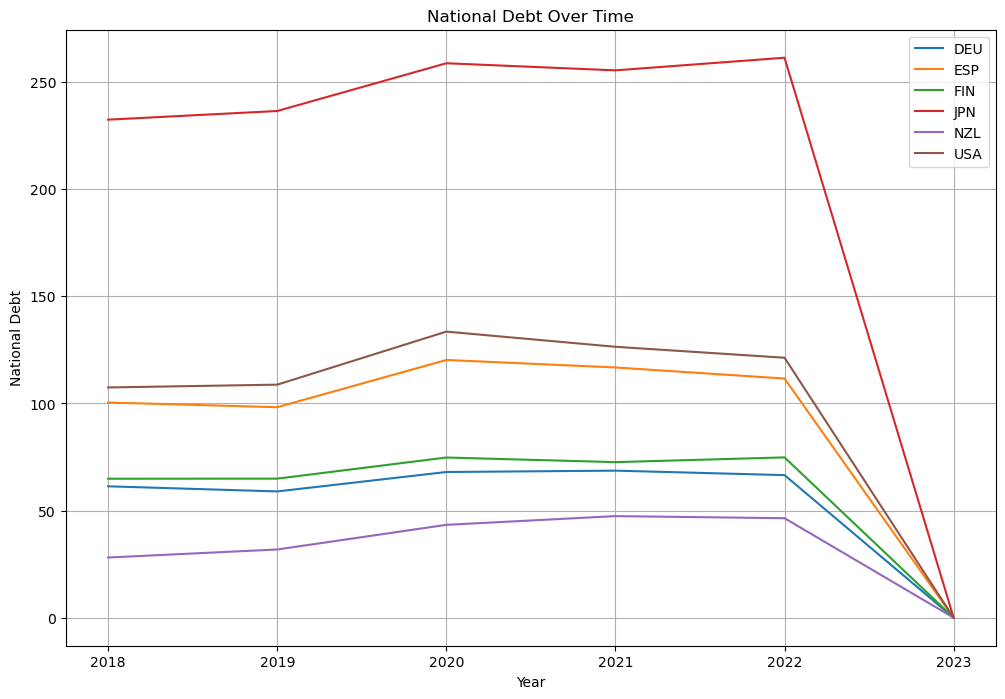

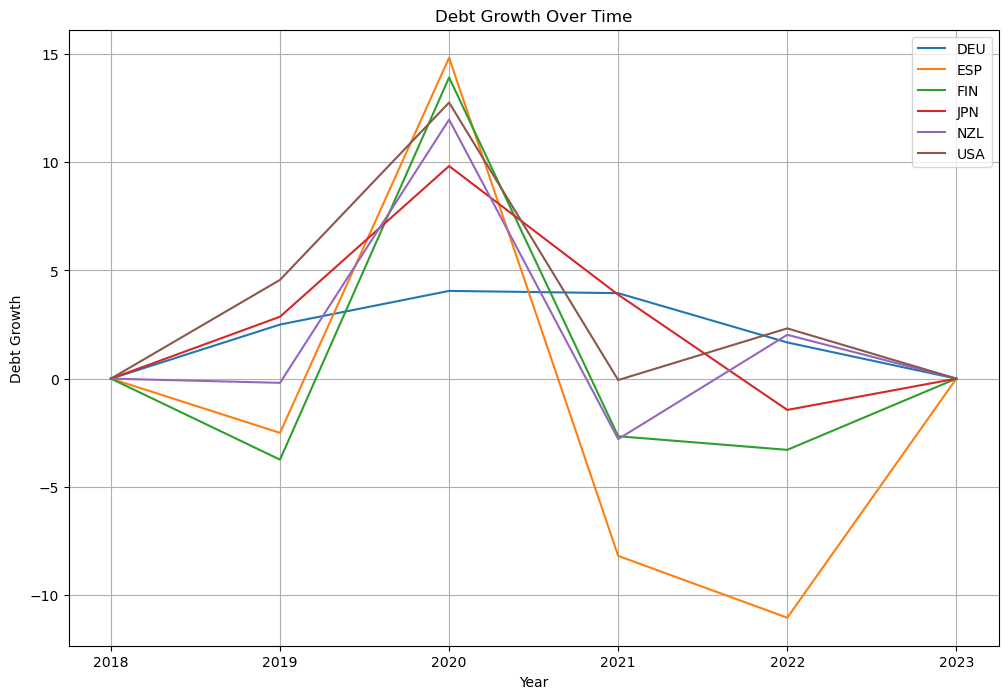

In [9]:
# Assuming 'selected_emer_df' is your DataFrame with the provided data
# Replace 'NaN' values with 0 for plotting
selected_adv_df['d'].fillna(0, inplace=True) #due to no reporting for 2023 there will be a major drop in this data to "0"

# Plotting the national debt for each country over the years
plt.figure(figsize=(12, 8))

for country in selected_adv_df['Country'].unique():
    country_data = selected_adv_df[selected_adv_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['d'], label=country)

plt.title('National Debt Over Time')
plt.xlabel('Year')
plt.ylabel('National Debt')
plt.legend()
plt.grid(True)
plt.show()

# Analyzing trends of debt growth
debt_growth = selected_emer_df.groupby('Country')['d'].diff().fillna(0)

plt.figure(figsize=(12, 8))
for country in selected_adv_df['Country'].unique():
    country_data = selected_adv_df[selected_adv_df['Country'] == country]
    plt.plot(country_data['Year'], debt_growth[country_data.index], label=country)

plt.title('Debt Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Debt Growth')
plt.legend()
plt.grid(True)
plt.show()


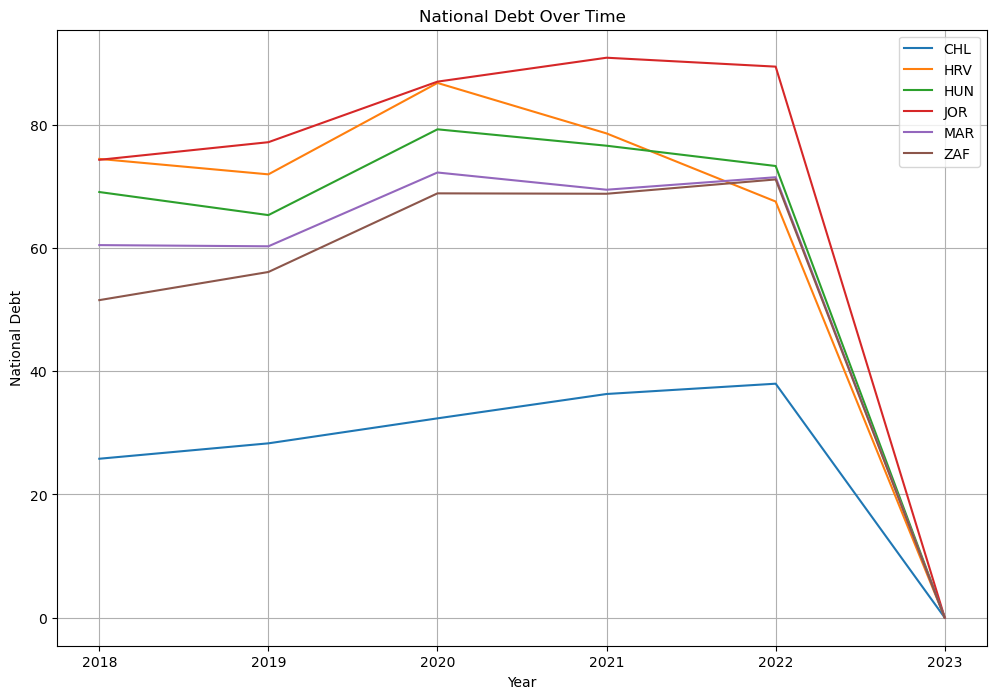

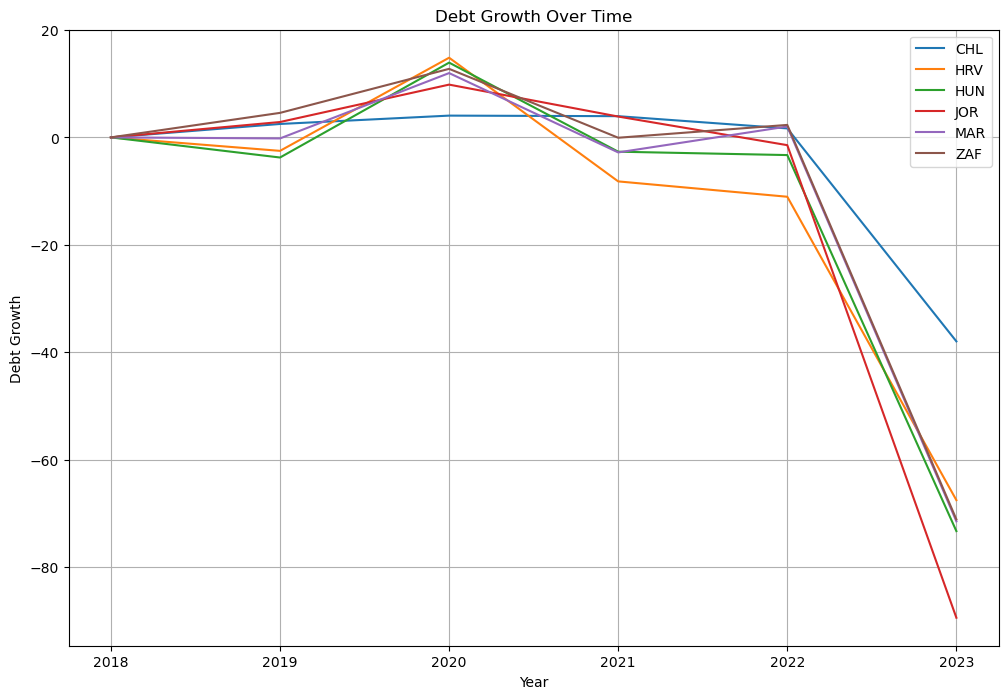

In [10]:
# Assuming 'selected_emer_df' is your DataFrame with the provided data
# Create a copy to avoid SettingWithCopyWarning
selected_emer_df_copy = selected_emer_df.copy()
# Replace 'NaN' values with 0 for plotting
selected_emer_df_copy['d'].fillna(0, inplace=True)

# Plotting the national debt for each country over the years
plt.figure(figsize=(12, 8))

for country in selected_emer_df_copy['Country'].unique():
    country_data = selected_emer_df_copy[selected_emer_df_copy['Country'] == country]
    plt.plot(country_data['Year'], country_data['d'], label=country)

plt.title('National Debt Over Time')
plt.xlabel('Year')
plt.ylabel('National Debt')
plt.legend()
plt.grid(True)
plt.show()

# Analyzing trends of debt growth
debt_growth = selected_emer_df_copy.groupby('Country')['d'].diff().fillna(0)

plt.figure(figsize=(12, 8))
for country in selected_emer_df_copy['Country'].unique():
    country_data = selected_emer_df_copy[selected_emer_df_copy['Country'] == country]
    plt.plot(country_data['Year'], debt_growth[country_data.index], label=country)

plt.title('Debt Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Debt Growth')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Descriptive statistics
debt_advanced_stats = selected_adv_df.groupby('Country')['d'].describe()
print(debt_advanced_stats)
# Descriptive statistics
debt_emer_stats = selected_emer_df.groupby('Country')['d'].describe()
print(debt_emer_stats)

         count        mean         std  min         25%         50%  \
Country                                                               
DEU        6.0   53.897698   26.684455  0.0   59.523259   63.925819   
ESP        6.0   91.210925   45.532764  0.0   98.769623  106.005654   
FIN        6.0   58.651714   29.093677  0.0   64.870112   68.743911   
JPN        6.0  207.368070  102.295507  0.0  233.397376  245.912367   
NZL        6.0   32.852963   17.940091  0.0   29.032646   37.588602   
USA        6.0   99.567082   49.808508  0.0  107.764782  115.026511   

                75%         max  
Country                          
DEU       67.623331   68.622975  
ESP      115.474587  120.265734  
FIN       74.213328   74.807149  
JPN      257.879966  261.288810  
NZL       45.659884   47.409599  
USA      125.138919  133.495543  
         count       mean       std        min        25%        50%  \
Country                                                                
CHL        5.0 